In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
from acquire_g import get_zillow_data
from prepare import acquire_and_prep_data, fips_labels, zillow_split, add_scaled_columns

In [2]:
# plt rc sets defaults for matplotlib figures
plt.rc("font", size=13)
plt.rc("figure", figsize= (13,7))

In [34]:
# acquiring the prep data
df = acquire_and_prep_data()
df.head()

,sqft,bathroomcnt,bedroomcnt,zipcode,taxamount,taxvaluedollarcnt,yearbuilt,tax_rate,county
0,1000,0.0,0,97083,212.46,27400.0,2002,0.78,Ventura County
1,1604,2.0,4,96415,6089.82,498347.0,1950,1.22,Los Angeles County
2,2384,3.0,3,96452,6679.55,549917.0,1937,1.21,Los Angeles County
3,1574,2.0,3,97319,3876.31,235272.0,1990,1.65,Los Angeles County
4,1619,2.0,2,97329,4206.15,340000.0,1983,1.24,Los Angeles County


In [14]:
# Splitting data into train validate and split
train, validate, test = zillow_split(df)
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')
train.head().T

train -> (10807, 9)
validate -> (4632, 9)
test -> (3860, 9)


,2459,7559,17309,12096,19197
sqft,1442,1355,3328,1412,2100
bathroomcnt,2,2,4,1,2
bedroomcnt,2,4,3,3,4
zipcode,96005,96186,96293,97113,96122
taxamount,8378.08,3031.24,11502.4,2580.04,1643.98
taxvaluedollarcnt,693537,260222,993231,239884,109506
yearbuilt,1987,1956,1979,1930,1973
tax_rate,1.21,1.16,1.16,1.08,1.5
county,Los Angeles County,Orange County,Los Angeles County,Ventura County,Los Angeles County


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10807 entries, 2459 to 15254
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sqft               10807 non-null  int64  
 1   bathroomcnt        10807 non-null  float64
 2   bedroomcnt         10807 non-null  int64  
 3   zipcode            10807 non-null  int64  
 4   taxamount          10807 non-null  float64
 5   taxvaluedollarcnt  10807 non-null  float64
 6   yearbuilt          10807 non-null  int64  
 7   tax_rate           10807 non-null  float64
 8   county             10807 non-null  object 
dtypes: float64(4), int64(4), object(1)
memory usage: 844.3+ KB


In [33]:
train.describe()

,sqft,bathroomcnt,bedroomcnt,zipcode,taxamount,taxvaluedollarcnt,yearbuilt,tax_rate
count,10807.000000,10807.000000,10807.000000,10807.000000,10807.000000,1.080700e+04,10807.000000,10807.000000
mean,1754.387434,2.217082,3.082261,96474.678357,5447.543364,4.450754e+05,1962.271121,1.324333
std,951.757552,1.002414,1.016788,2942.814998,6789.625921,5.963024e+05,23.010068,0.384850
min,172.000000,0.000000,0.000000,95982.000000,37.650000,3.257000e+03,1885.000000,0.000000
25%,1183.000000,2.000000,2.000000,96150.000000,2484.940000,1.839810e+05,1949.000000,1.190000
50%,1532.000000,2.000000,3.000000,96337.000000,3975.000000,3.130030e+05,1960.000000,1.240000
75%,2061.000000,3.000000,4.000000,96531.000000,6260.510000,5.180000e+05,1979.000000,1.360000
max,26345.000000,20.000000,25.000000,399675.000000,228999.210000,1.912982e+07,2015.000000,15.510000


In [31]:
# Most common types of homes have 1-5 bedrooms. Have a few with 0
train.bedroomcnt.value_counts()

3     4631
4     2538
2     2521
5      611
1      326
6      101
0       50
7       18
8        6
9        3
10       1
25       1
Name: bedroomcnt, dtype: int64

In [32]:
# Most common bathrooms are 1-4
train.bathroomcnt.value_counts()

2.0     4661
3.0     2322
1.0     2250
2.5      564
4.0      445
5.0      141
1.5      129
3.5       93
4.5       63
6.0       49
0.0       31
7.0       29
5.5       17
9.0        3
8.0        2
10.0       2
6.5        2
11.0       1
20.0       1
7.5        1
19.5       1
Name: bathroomcnt, dtype: int64

In [54]:
train.zipcode.value_counts()

96193     126
96368     103
97319      92
97328      90
96361      85
         ... 
399675      1
97108       1
96207       1
96329       1
96226       1
Name: zipcode, Length: 381, dtype: int64

In [53]:
train.sqft.value_counts()

1200    30
1080    29
960     21
1260    20
1040    20
        ..
710      1
2759     1
718      1
2767     1
426      1
Name: sqft, Length: 2894, dtype: int64

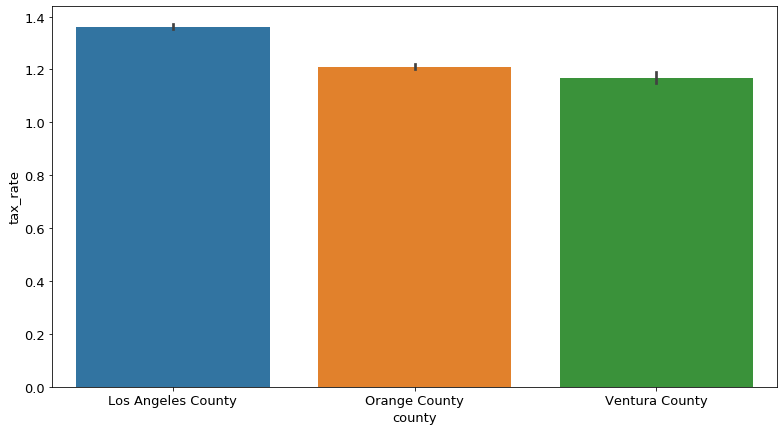

In [18]:
# Shows the tax rate per county. IS THIS THE AVG?
sns.barplot(data=train, y='tax_rate', x='county')

(0, 6)

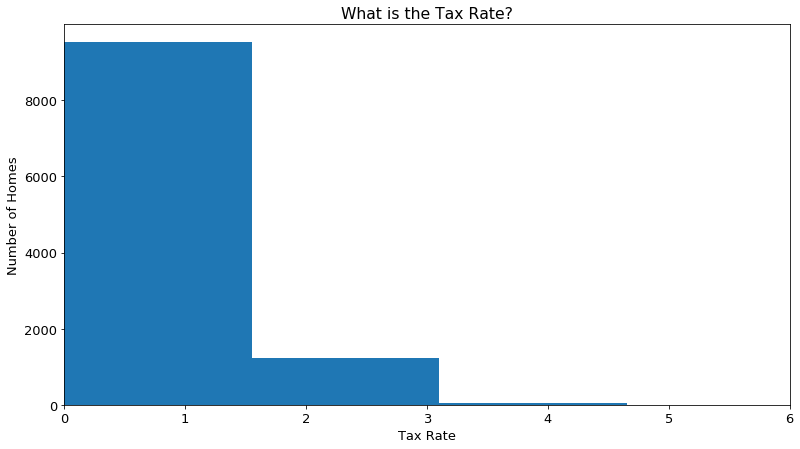

In [39]:
# Majority of homes have a tax rate from 0-1%
plt.hist(train.tax_rate)
plt.xlabel('Tax Rate')
plt.ylabel('Number of Homes')
plt.title('What is the Tax Rate?')
plt.xlim(0,6)

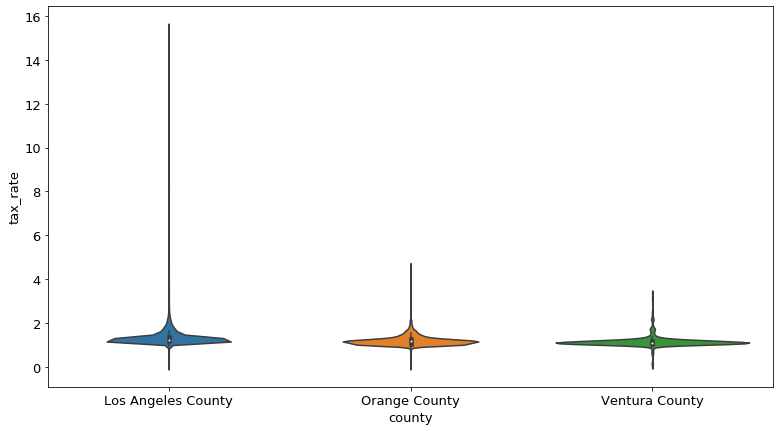

In [21]:
sns.violinplot(data=train, y='tax_rate', x='county')

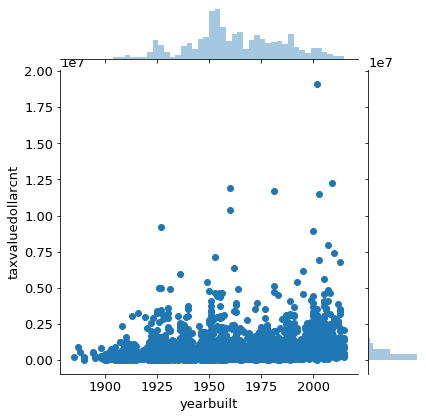

In [22]:
sns.jointplot(x='yearbuilt', y='taxvaluedollarcnt', data=train)

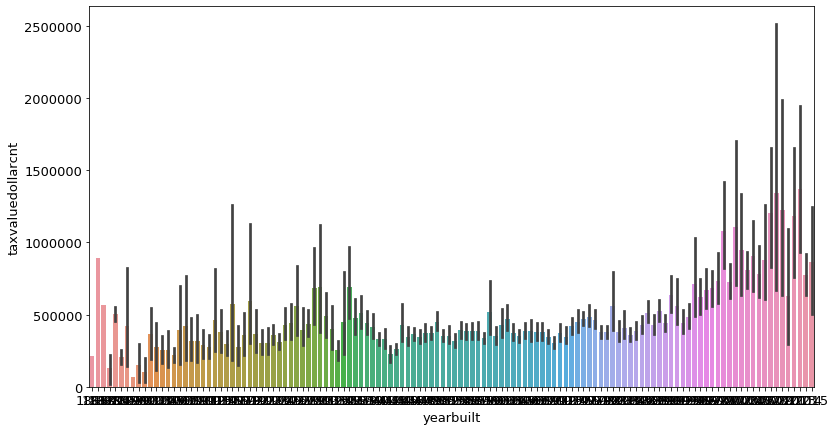

In [23]:
# Shows that newer homes seem to have a higher home value
sns.barplot(x='yearbuilt', y='taxvaluedollarcnt', data=train)

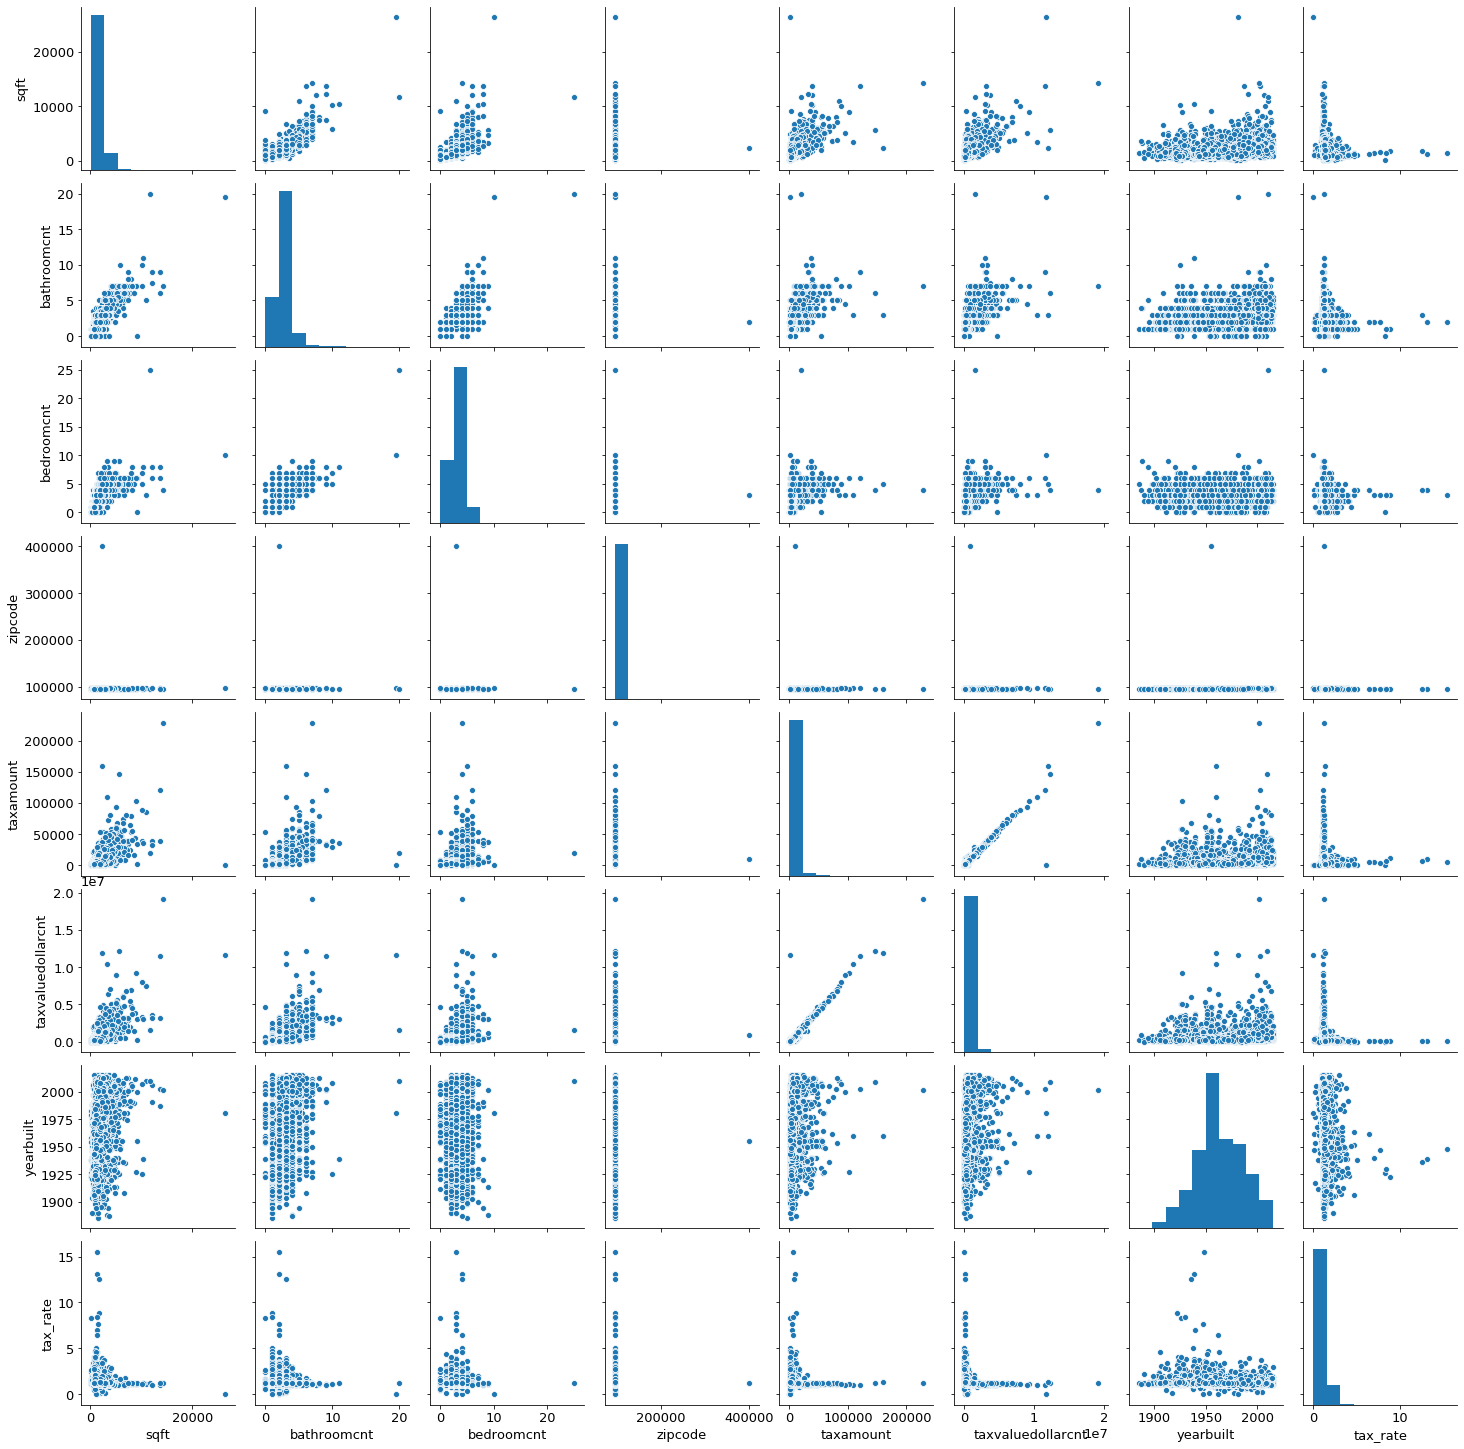

In [24]:
sns.pairplot(train)

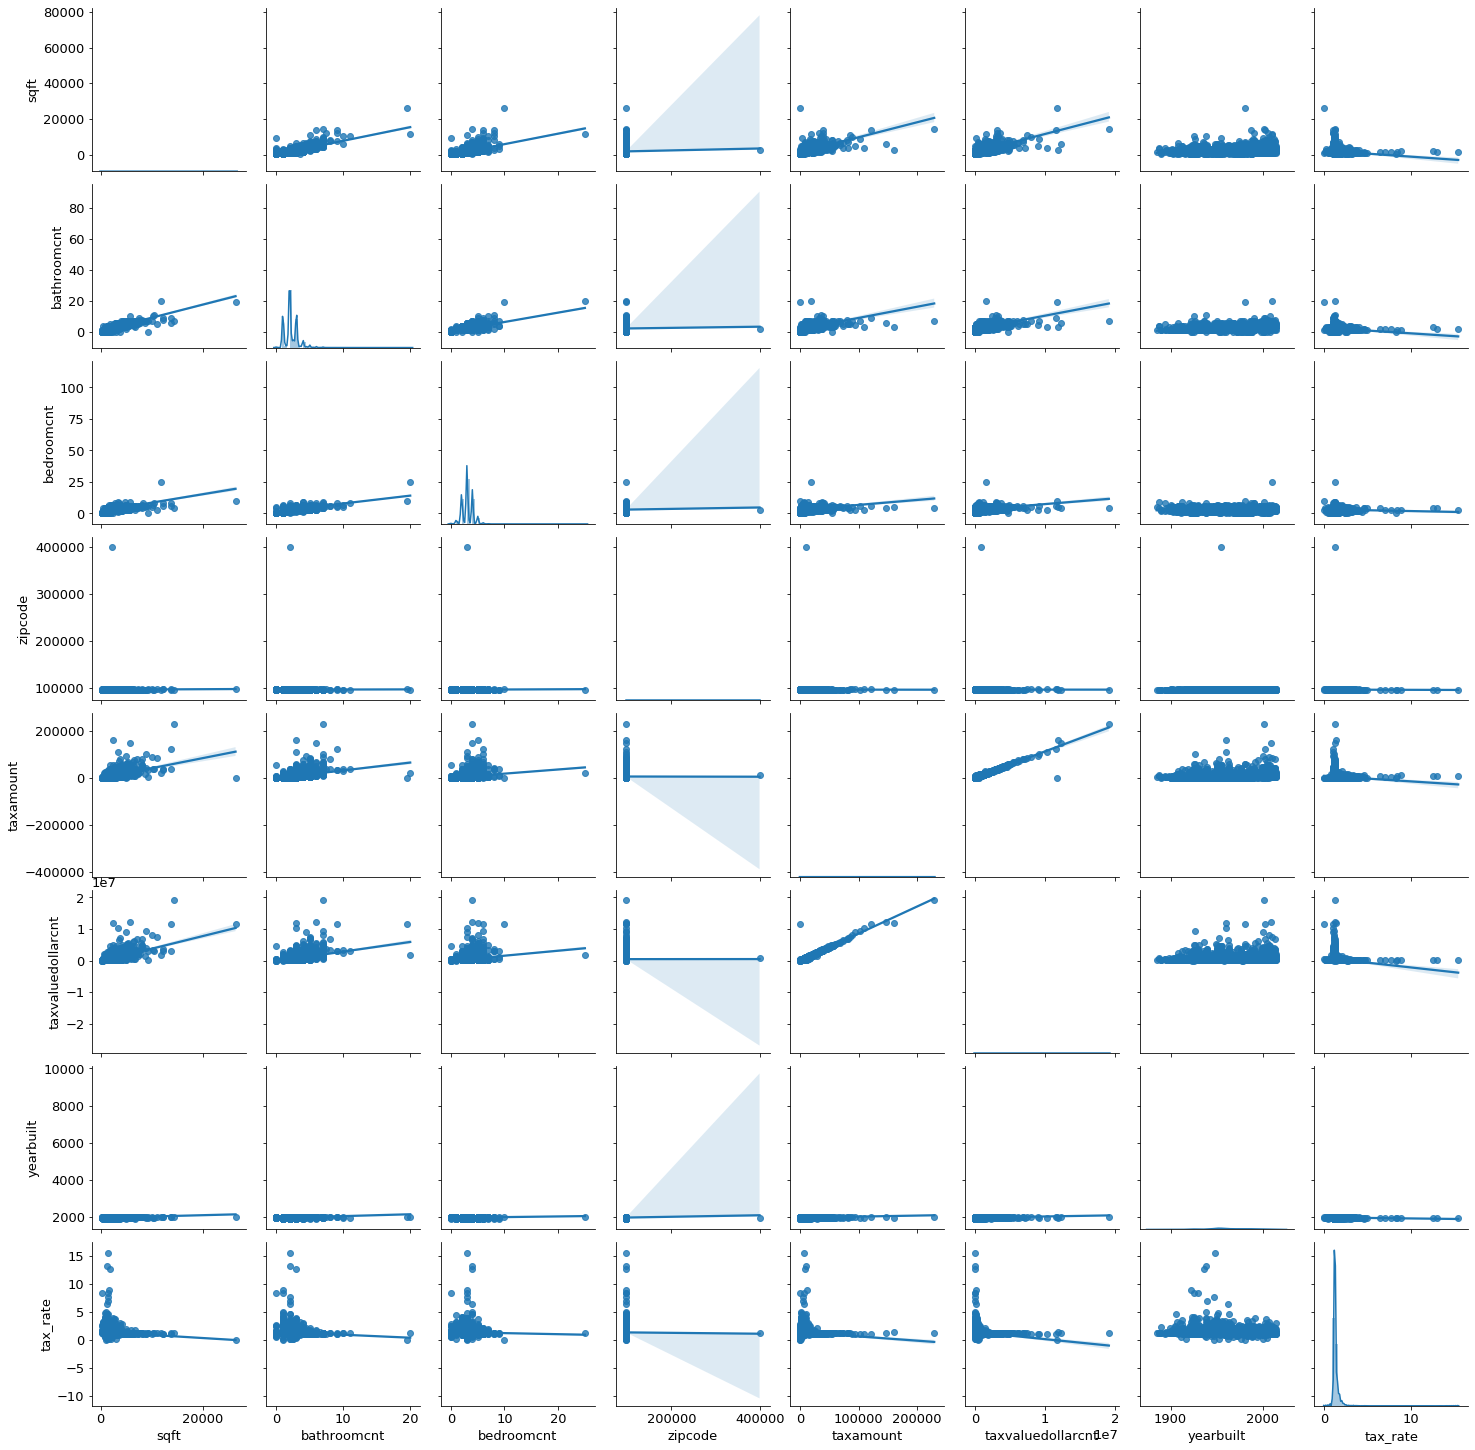

In [25]:
g = sns.PairGrid(train)
# we can specify any two functions we want for visualization
g.map_diag(sns.distplot) # one for a single variable
g.map_offdiag(sns.regplot) # one for the interaction of two variables

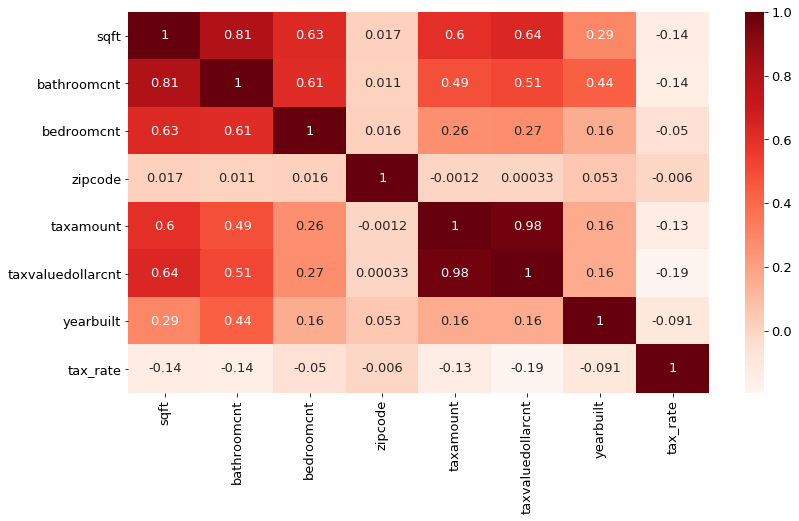

In [27]:
sns.heatmap(train.corr(), cmap='Reds', annot=True)

In [26]:
# sqft, bathrromcnt, and bedroomcnt have the bet correlation
train.corr()

,sqft,bathroomcnt,bedroomcnt,zipcode,taxamount,taxvaluedollarcnt,yearbuilt,tax_rate
sqft,1.000000,0.806129,0.628567,0.016781,0.600252,0.640154,0.290781,-0.137057
bathroomcnt,0.806129,1.000000,0.614450,0.011113,0.490272,0.514137,0.436561,-0.139125
bedroomcnt,0.628567,0.614450,1.000000,0.016294,0.263466,0.268098,0.159702,-0.050087
zipcode,0.016781,0.011113,0.016294,1.000000,-0.001226,0.000331,0.052864,-0.006005
taxamount,0.600252,0.490272,0.263466,-0.001226,1.000000,0.975938,0.163069,-0.134193
taxvaluedollarcnt,0.640154,0.514137,0.268098,0.000331,0.975938,1.000000,0.161359,-0.194744
yearbuilt,0.290781,0.436561,0.159702,0.052864,0.163069,0.161359,1.000000,-0.090511
tax_rate,-0.137057,-0.139125,-0.050087,-0.006005,-0.134193,-0.194744,-0.090511,1.000000


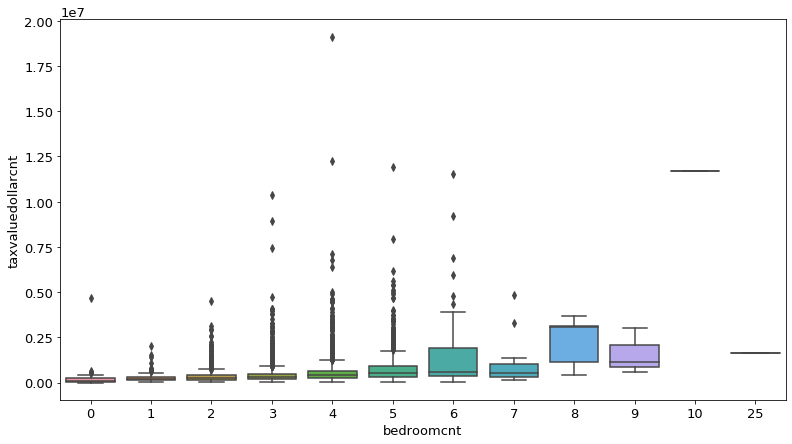

In [43]:
sns.boxplot(data=train, y='taxvaluedollarcnt', x='bedroomcnt')

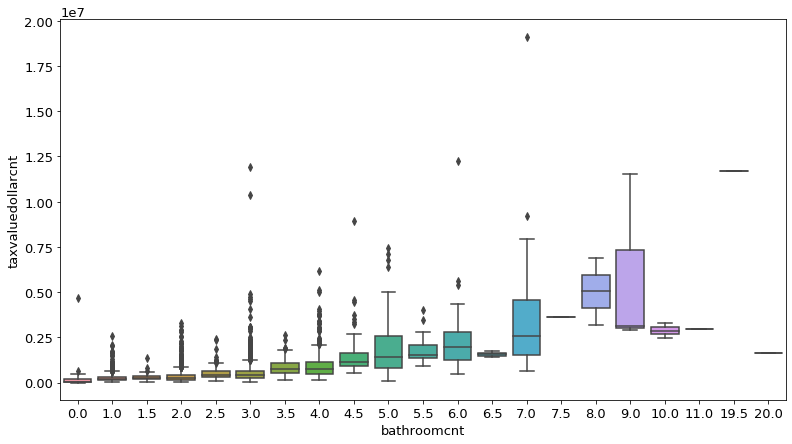

In [44]:
sns.boxplot(data=train, y='taxvaluedollarcnt', x='bathroomcnt')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

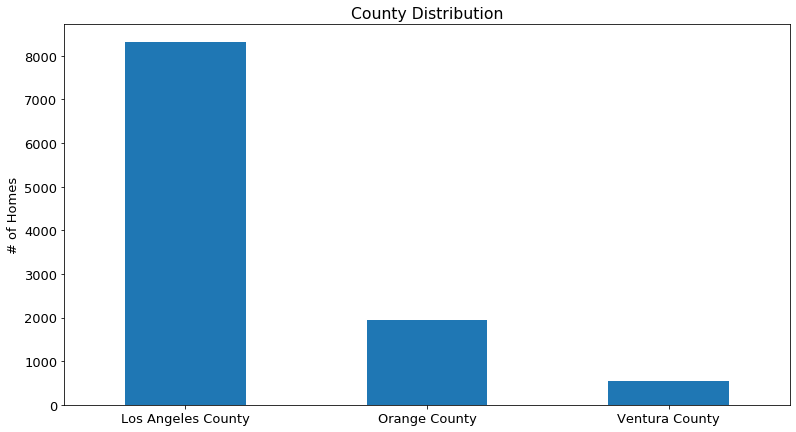

In [46]:
train.county.value_counts().sort_index().plot.bar()
plt.title('County Distribution')
plt.ylabel('# of Homes')
plt.xticks(rotation=0)

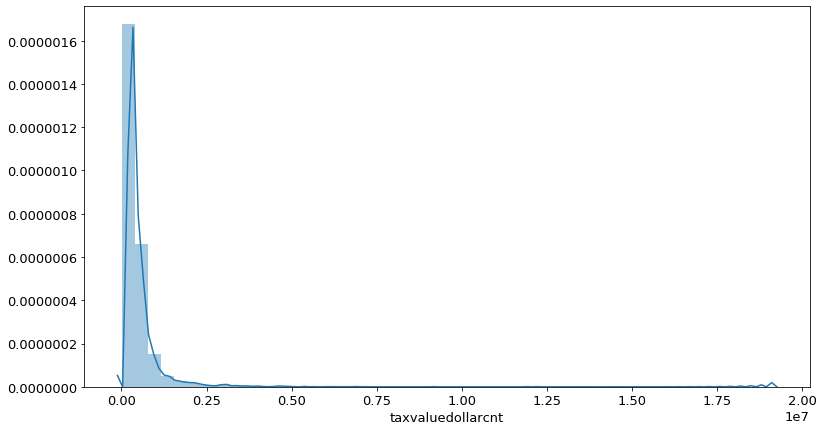

In [50]:
sns.distplot(train[train.county == 'Los Angeles County'].taxvaluedollarcnt)

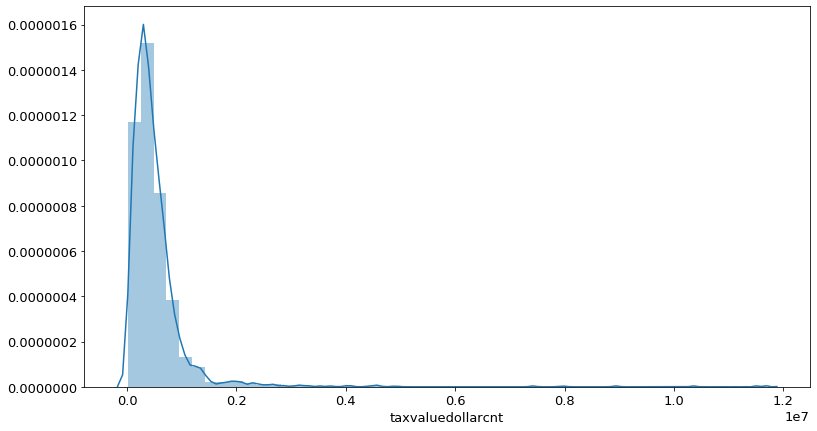

In [51]:
sns.distplot(train[train.county == 'Orange County'].taxvaluedollarcnt)

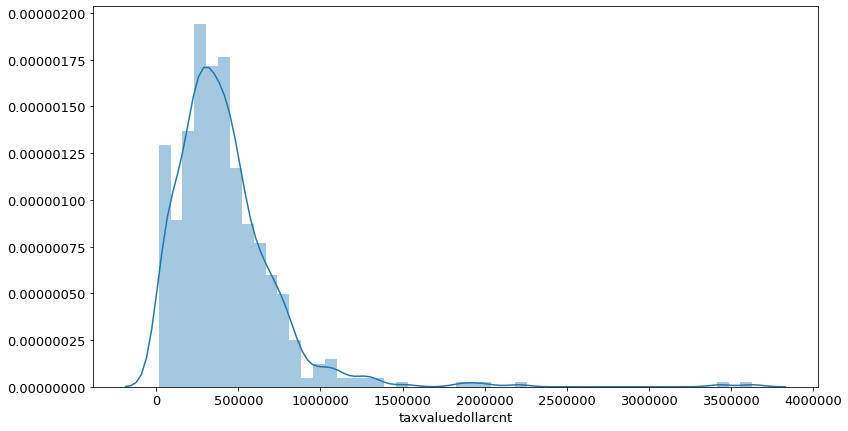

In [52]:
sns.distplot(train[train.county == 'Ventura County'].taxvaluedollarcnt)

In [55]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   acquire_prep_g.ipynb
	modified:   prepare.py

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	explore_g.ipynb
	wrangle.py

no changes added to commit (use "git add" and/or "git commit -a")


In [58]:
!git add -A

In [59]:
!git commit -m "Adding explore and wrangle"

[master 7845ce8] Adding explore and wrangle
 4 files changed, 1492 insertions(+), 10 deletions(-)
 create mode 100644 explore_g.ipynb
 create mode 100644 wrangle.py


In [60]:
!git push

To https://github.com/The-BGs/zillow_regression_project.git
 ! [rejected]        master -> master (fetch first)
error: failed to push some refs to 'https://github.com/The-BGs/zillow_regression_project.git'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.
